# Кластеризация текста

In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Загрузка данных
reviews = pd.read_csv('../data/raw/olist_order_reviews_dataset.csv')


In [2]:

# Оставим только текст и рейтинг
reviews = reviews[['review_comment_message', 'review_score']].dropna()

# Очистка текста
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

reviews['cleaned'] = reviews['review_comment_message'].apply(clean_text)


# Облако слов из отзывов покупателей

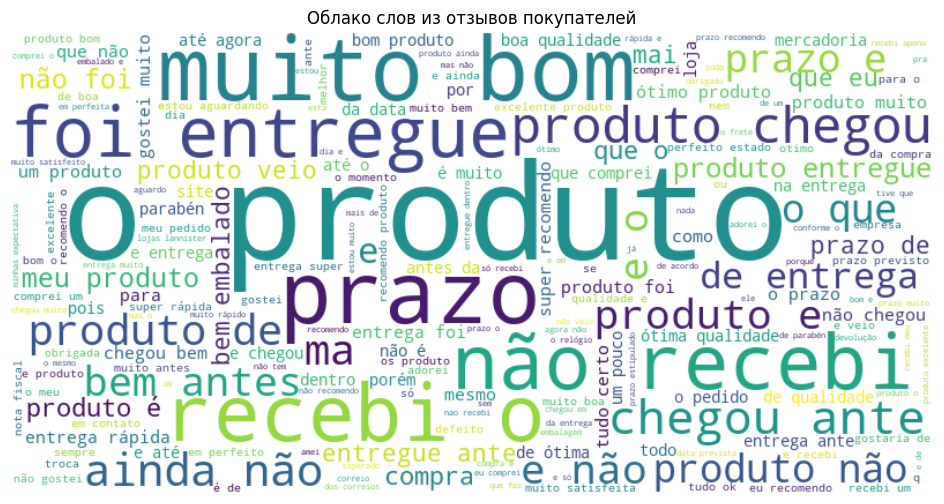

In [3]:
all_text = ' '.join(reviews['cleaned'].values)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов из отзывов покупателей')
plt.show()


In [4]:
# TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(reviews['cleaned'])

# Кластеризация
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

reviews['cluster'] = clusters


In [5]:
terms = tfidf.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(4):
    print(f"Кластер {i}:")
    print(", ".join([terms[ind] for ind in order_centroids[i, :10]]))
    print()


Кластер 0:
bom, muito, produto, recomendo, entrega, atendimento, rápida, no, prazo, gostei

Кластер 1:
ótimo, produto, recomendo, entrega, prazo, rápida, atendimento, vendedor, do, antes

Кластер 2:
prazo, do, antes, chegou, produto, entregue, bem, entrega, dentro, muito

Кластер 3:
produto, não, de, que, recebi, recomendo, entrega, muito, com, foi

